In [30]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [40]:
og_data = 'speech_data/male.wav'
y,sr = librosa.load(og_data, sr = 16000)

print(y.shape, sr) # 816452/16000 =~ 51s

(816452,) 16000


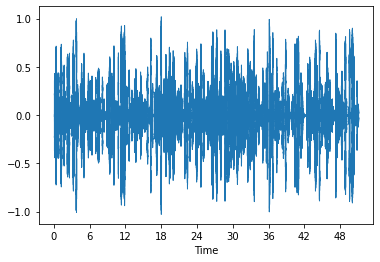

In [20]:
librosa.display.waveshow(y, sr=sr)

[[-1.88909337e-01+0.0000000e+00j -2.00460389e-01+0.0000000e+00j
  -2.02118844e-01+0.0000000e+00j ...  6.06767926e-03+0.0000000e+00j
  -6.25447631e-02+0.0000000e+00j -1.10620916e-01+0.0000000e+00j]
 [ 1.48371994e-01-3.4586049e-17j  4.67366949e-02-1.3432625e-02j
   1.71580330e-01+9.7877569e-03j ... -1.61683410e-02-4.2625397e-02j
   4.60791625e-02-2.5352491e-02j  5.58502339e-02-2.2572776e-02j]
 [-8.66806954e-02+1.1400805e-16j  1.26304552e-01-1.0351083e-02j
  -1.34307727e-01-1.2039021e-02j ...  2.40118261e-02+1.8668341e-02j
  -2.56090350e-02-9.4516082e-03j  1.86052695e-02+2.5672577e-02j]
 ...
 [ 4.52082371e-04-9.0806127e-17j -2.25513533e-04+8.2021160e-07j
  -6.16281170e-07-5.4755492e-07j ... -2.40752343e-07-5.5594313e-08j
  -1.07683054e-05+2.5617366e-05j  1.05353465e-04-2.4206155e-04j]
 [-4.52289853e-04-9.6277153e-17j -9.77659852e-07+2.2585658e-04j
  -3.01080235e-07+7.0268311e-07j ...  8.53893525e-08-1.7205720e-07j
  -2.36697178e-05+1.5170408e-05j  1.44569116e-04+2.2103472e-04j]
 [ 4.53205

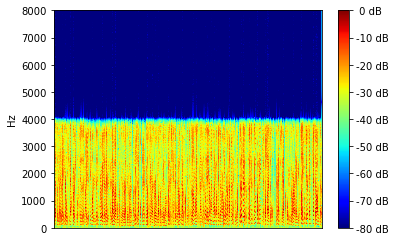

In [32]:
# stft의 power 추출
## abs = absolute(절대값)
S = np.abs(librosa.stft(y)) 
print(stft)
S_dB =librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, sr=sr, hop_length = None, y_axis='linear', cmap = cm.jet)
plt.colorbar(format='%2.0f dB')
plt.show()


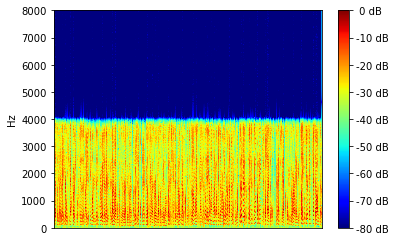

In [56]:
S_left = np.abs(librosa.stft(y, center = False))
S_left_dB =librosa.power_to_db(S_left, ref=np.max)
librosa.display.specshow(S_dB, sr=sr, hop_length = None, y_axis='linear', cmap = cm.jet)
plt.colorbar(format='%2.0f dB') # %n.mf -> n : 자리 이동, m : 자릿수
plt.show()


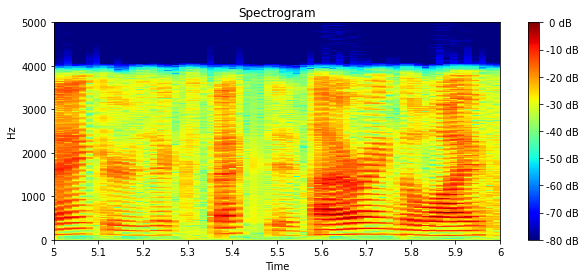

In [96]:
S_len = np.abs(librosa.stft(y, n_fft=4096, hop_length=512, win_length=2048))
S_len_dB = librosa.power_to_db(S_len, ref = np.max)
plt.figure(figsize=(10,4))

librosa.display.specshow(S_len_dB, sr=sr, hop_length=256, y_axis='linear', x_axis = 'time', cmap=cm.jet)
plt.colorbar(format='%2.0f dB')
plt.xlim(5,6)
plt.ylim(0,5000)
plt.title('Spectrogram');
# plt.savefig('Spectrogram_fft4096hop512win2048.png')
plt.show()

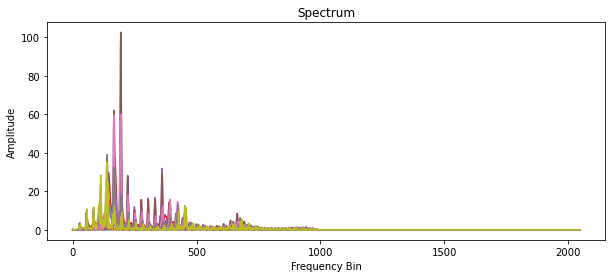

In [106]:
n_fft = 4096 # stft의 n_fft와 동일 (대략 1/8s)
plt.figure(figsize=(10,4))
ft = np.abs(librosa.stft(y[4*n_fft:5*n_fft], n_fft = n_fft, hop_length = 512, win_length = 2048))
#ft = librosa.power_to_db(ft, ref=np.max)
plt.plot(ft);
plt.title('Spectrum');
plt.xlabel('Frequency Bin');
plt.ylabel('Amplitude');

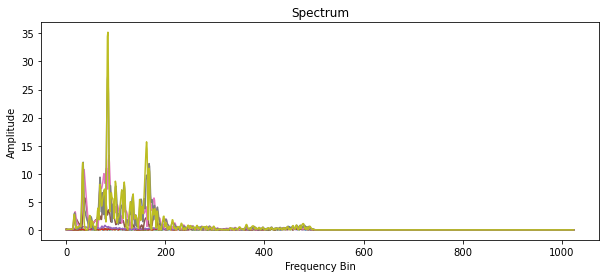

In [113]:
n_fft = 2048 # stft의 n_fft와 동일 (대략 1/8s)
plt.figure(figsize=(10,4))
ft = np.abs(librosa.stft(y[4*n_fft:5*n_fft], n_fft = n_fft, hop_length = 256, win_length = 1024))
#ft = librosa.power_to_db(ft, ref=np.max)
plt.plot(ft);
plt.title('Spectrum');
plt.xlabel('Frequency Bin');
plt.ylabel('Amplitude');